# Explore Sentiment140 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("/content/drive/MyDrive/bachelor project/training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding='ISO-8859-1')
df.head()

sentiment          id                          date query_string  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009     NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009     NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009     NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.sentiment.value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

In [7]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)
df.head()

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....

In [8]:
df[df.sentiment == 0].head(10)

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
5          0                      @Kwesidei not the whole crew 
6          0                                        Need a hug 
7          0  @LOLTrish hey  long time no see! Yes.. Rains a...
8          0               @Tatiana_K nope they didn't have it 
9          0                          @twittera que me muera ?

In [9]:
df[df.sentiment == 4].head(10)

sentiment                                               text
800000          4       I LOVE @Health4UandPets u guys r the best!! 
800001          4  im meeting up with one of my besties tonight! ...
800002          4  @DaRealSunisaKim Thanks for the Twitter add, S...
800003          4  Being sick can be really cheap when it hurts t...
800004          4    @LovesBrooklyn2 he has that effect on everyone 
800005          4  @ProductOfFear You can tell him that I just bu...
800006          4  @r_keith_hill Thans for your response. Ihad al...
800007          4  @KeepinUpWKris I am so jealous, hope you had a...
800008          4  @tommcfly ah, congrats mr fletcher for finally...
800009          4  @e4VoIP I RESPONDED  Stupid cat is helping me ...

In [10]:
df[df.sentiment == 0].index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997, 799998,
       799999],
      dtype='int64', length=800000)

In [11]:
df[df.sentiment == 4].index

Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,  800007,
        800008,  800009,
       ...
       1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996, 1599997,
       1599998, 1599999],
      dtype='int64', length=800000)

# Data Cleaning

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv("/content/drive/MyDrive/bachelor project/training.1600000.processed.noemoticon.csv",
                 header=None, usecols=[0, 5], names=['sentiment', 'text'], encoding='ISO-8859-1')
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.head()

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....

In [16]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%100000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, len(df) ) )
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning the tweets...



<ipython-input-13-564b967f40af>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
CPU times: user 8min 9s, sys: 11.9 s, total: 8min 21s
Wall time: 8min 17s


In [17]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
# Ensure the folder path exists in Google Drive
save_path = "/content/drive/MyDrive/bachelor project/clean_tweet.csv"

# Save the DataFrame to the specified path
clean_df.to_csv(save_path, encoding='utf-8')

In [18]:
#path to the CSV file in Google Drive
csv = "/content/drive/MyDrive/bachelor project/clean_tweet.csv"

# Read the CSV file into a DataFrame
my_df = pd.read_csv(csv, index_col=0)

# Display the first few rows
my_df.head()

text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [19]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [20]:
my_df[my_df.isnull().any(axis=1)].head()

text  target
208  NaN       0
249  NaN       0
282  NaN       0
398  NaN       0
430  NaN       0

In [21]:
np.sum(my_df.isnull().any(axis=1))

3959

In [22]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset,
it must have happened during the cleaning process.

In [23]:
df = pd.read_csv("/content/drive/MyDrive/bachelor project/training.1600000.processed.noemoticon.csv",header=None, encoding='ISO-8859-1')
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

0           1                             2         3             4  \
208  0  1467863072  Mon Apr 06 22:33:25 PDT 2009  NO_QUERY      Artiel87   
249  0  1467874569  Mon Apr 06 22:36:27 PDT 2009  NO_QUERY      Artiel87   
282  0  1467881474  Mon Apr 06 22:38:20 PDT 2009  NO_QUERY     __Susan__   
398  0  1467912842  Mon Apr 06 22:46:53 PDT 2009  NO_QUERY  KimberlyKane   
430  0  1467919452  Mon Apr 06 22:48:48 PDT 2009  NO_QUERY     jtmal0723   

                         5  
208             @mandayyy   
249           @mandayyy     
282  @ITS_NEMESIS -------   
398         @danadearmond   
430             @anistorm

By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address.
Anyway, these are the info I decided to discard for the sentiment analysis, so I will drop these null rows, and update the data frame.

In [24]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [25]:
# Define the path
csv_path = "/content/drive/MyDrive/bachelor project/clean_tweet.csv"

# Save the updated DataFrame back to the same location
my_df.to_csv(csv_path, encoding='utf-8')

# Visualizing Textual Data with Word Cloud

In [ ]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

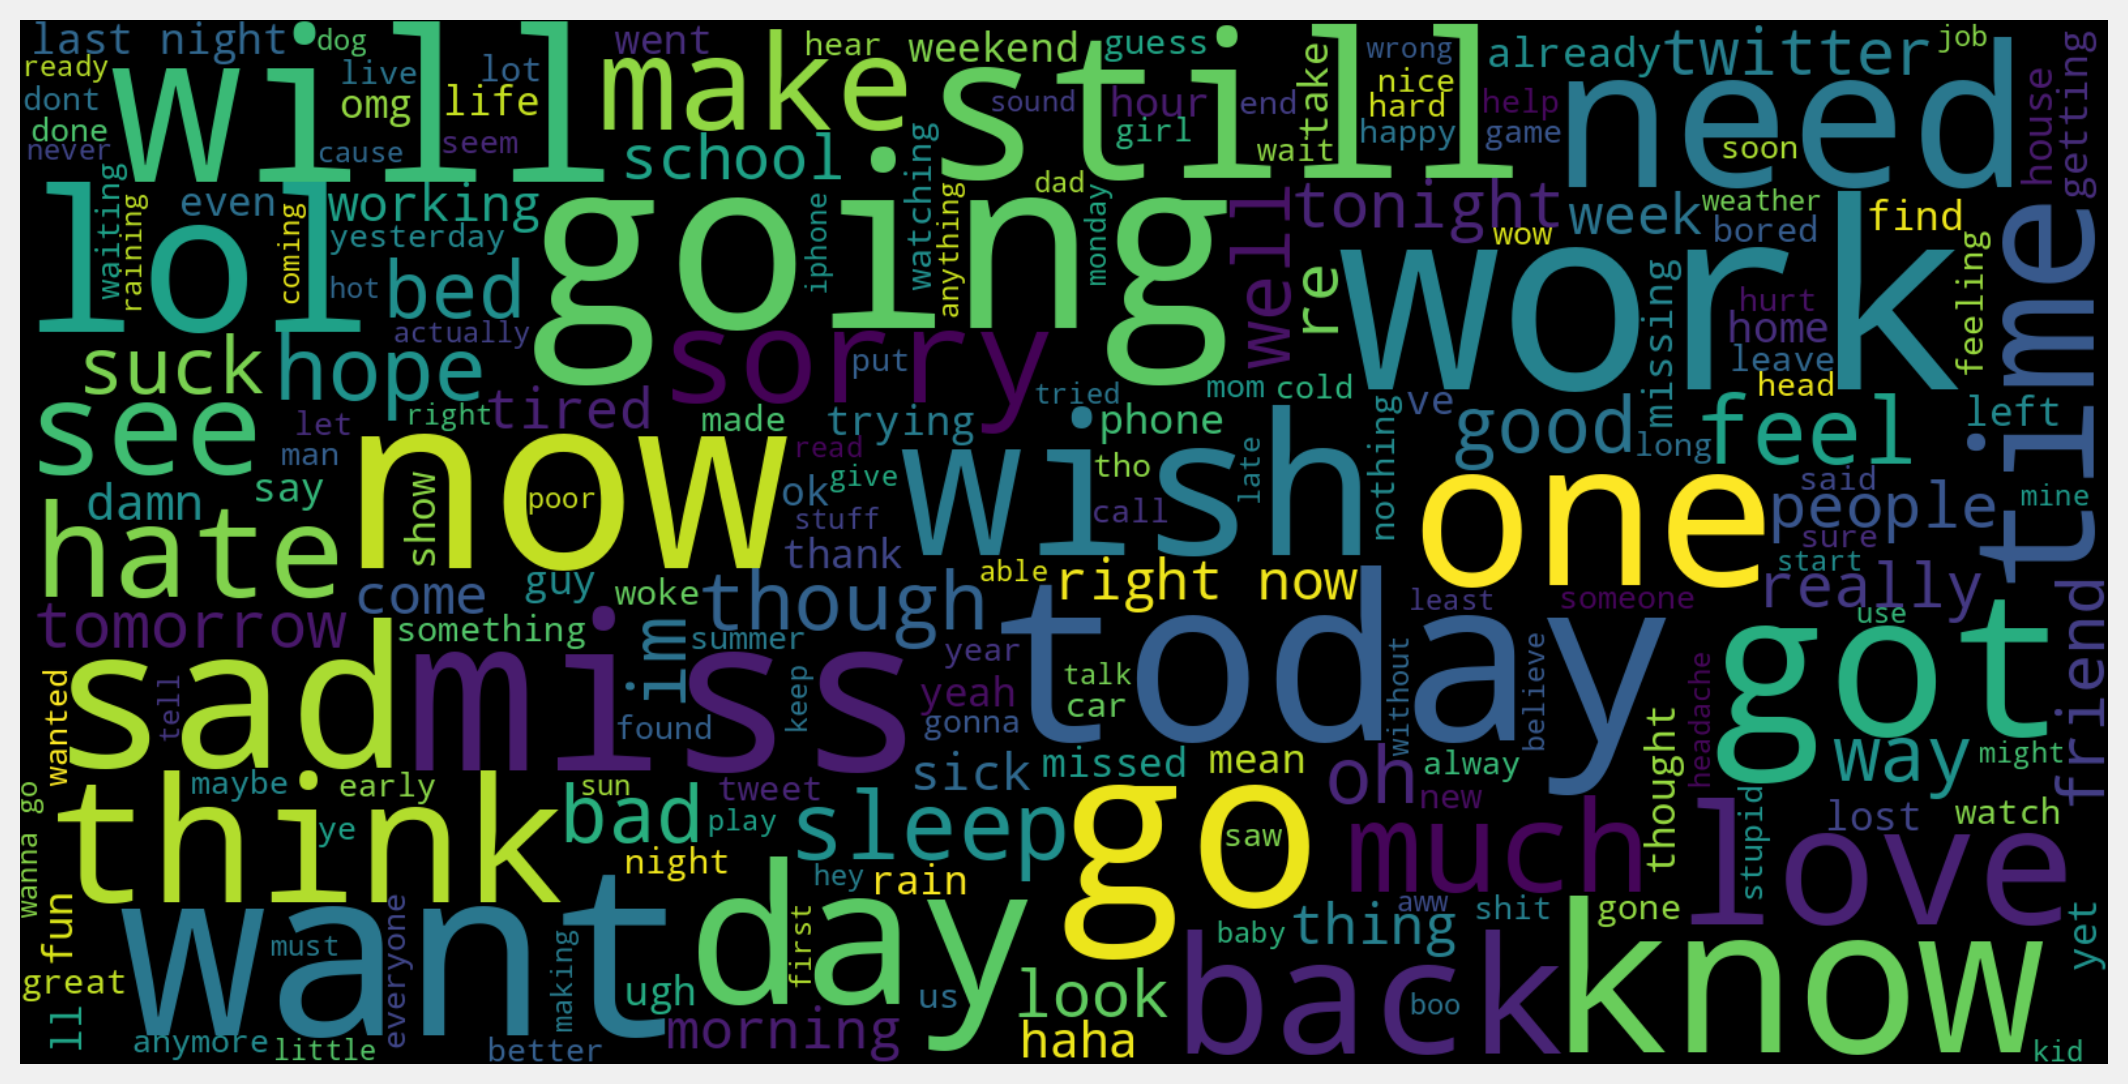

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print(t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe love you too am here miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz like what do much love
missing you babe but as long as your alive happy ya tired my love imma try to sleep hopefully you had headstart
love the french tell people here in the south qtr french and they snarl at me french are beautiful people


In [ ]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

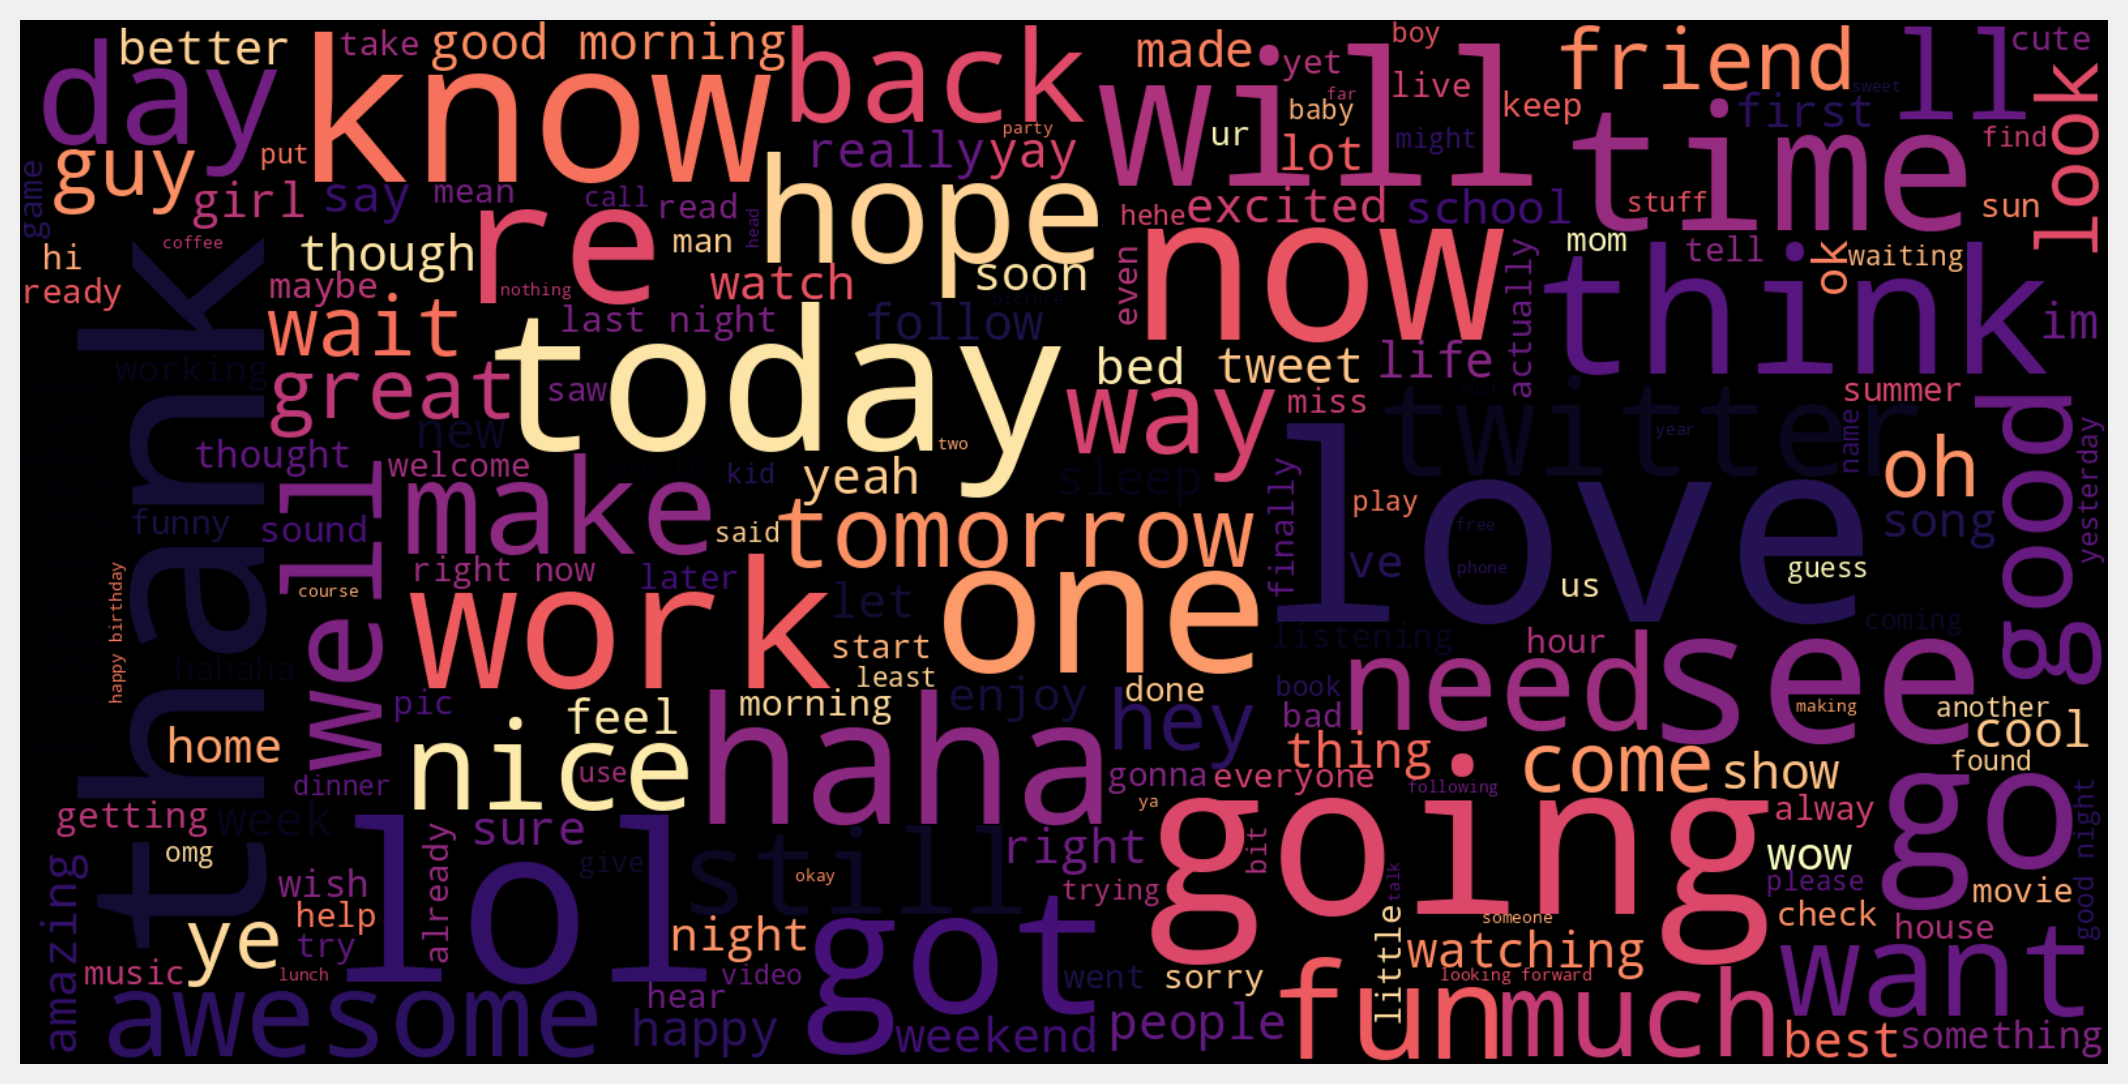

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
del pos_tweets, pos_string, neg_tweets, neg_string, wordcloud, df

# Preparation for data visualisation

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer()

In [27]:
len(cvec.get_feature_names_out())

264939

In [28]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()

In [29]:
term_freq_df.head()

0   1
aa      160  92
aaa      93  54
aaaa     45  29
aaaaa    26  12
aaaaaa   16  12

In [30]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

negative  positive   total
to     313162    252567  565729
the    257836    265998  523834
my     190775    125955  316730
it     157448    147786  305234
and    153958    149642  303600
you    103844    198245  302089
not    194724     86861  281585
is     133432    111191  244623
in     115542    101160  216702
for     98999    117369  216368

In [31]:
len(term_freq_df)

264939

In [32]:
# Define the full path for the output CSV file in Google Drive
save_path = "/content/drive/MyDrive/bachelor project/term_freq_df.csv"

# Save the DataFrame to the specified path
term_freq_df.to_csv(save_path, encoding='utf-8')

# Zipf's Law

<ipython-input-33-548edeb11a6a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]


Text(0.5, 1.0, 'Top 500 tokens in tweets')

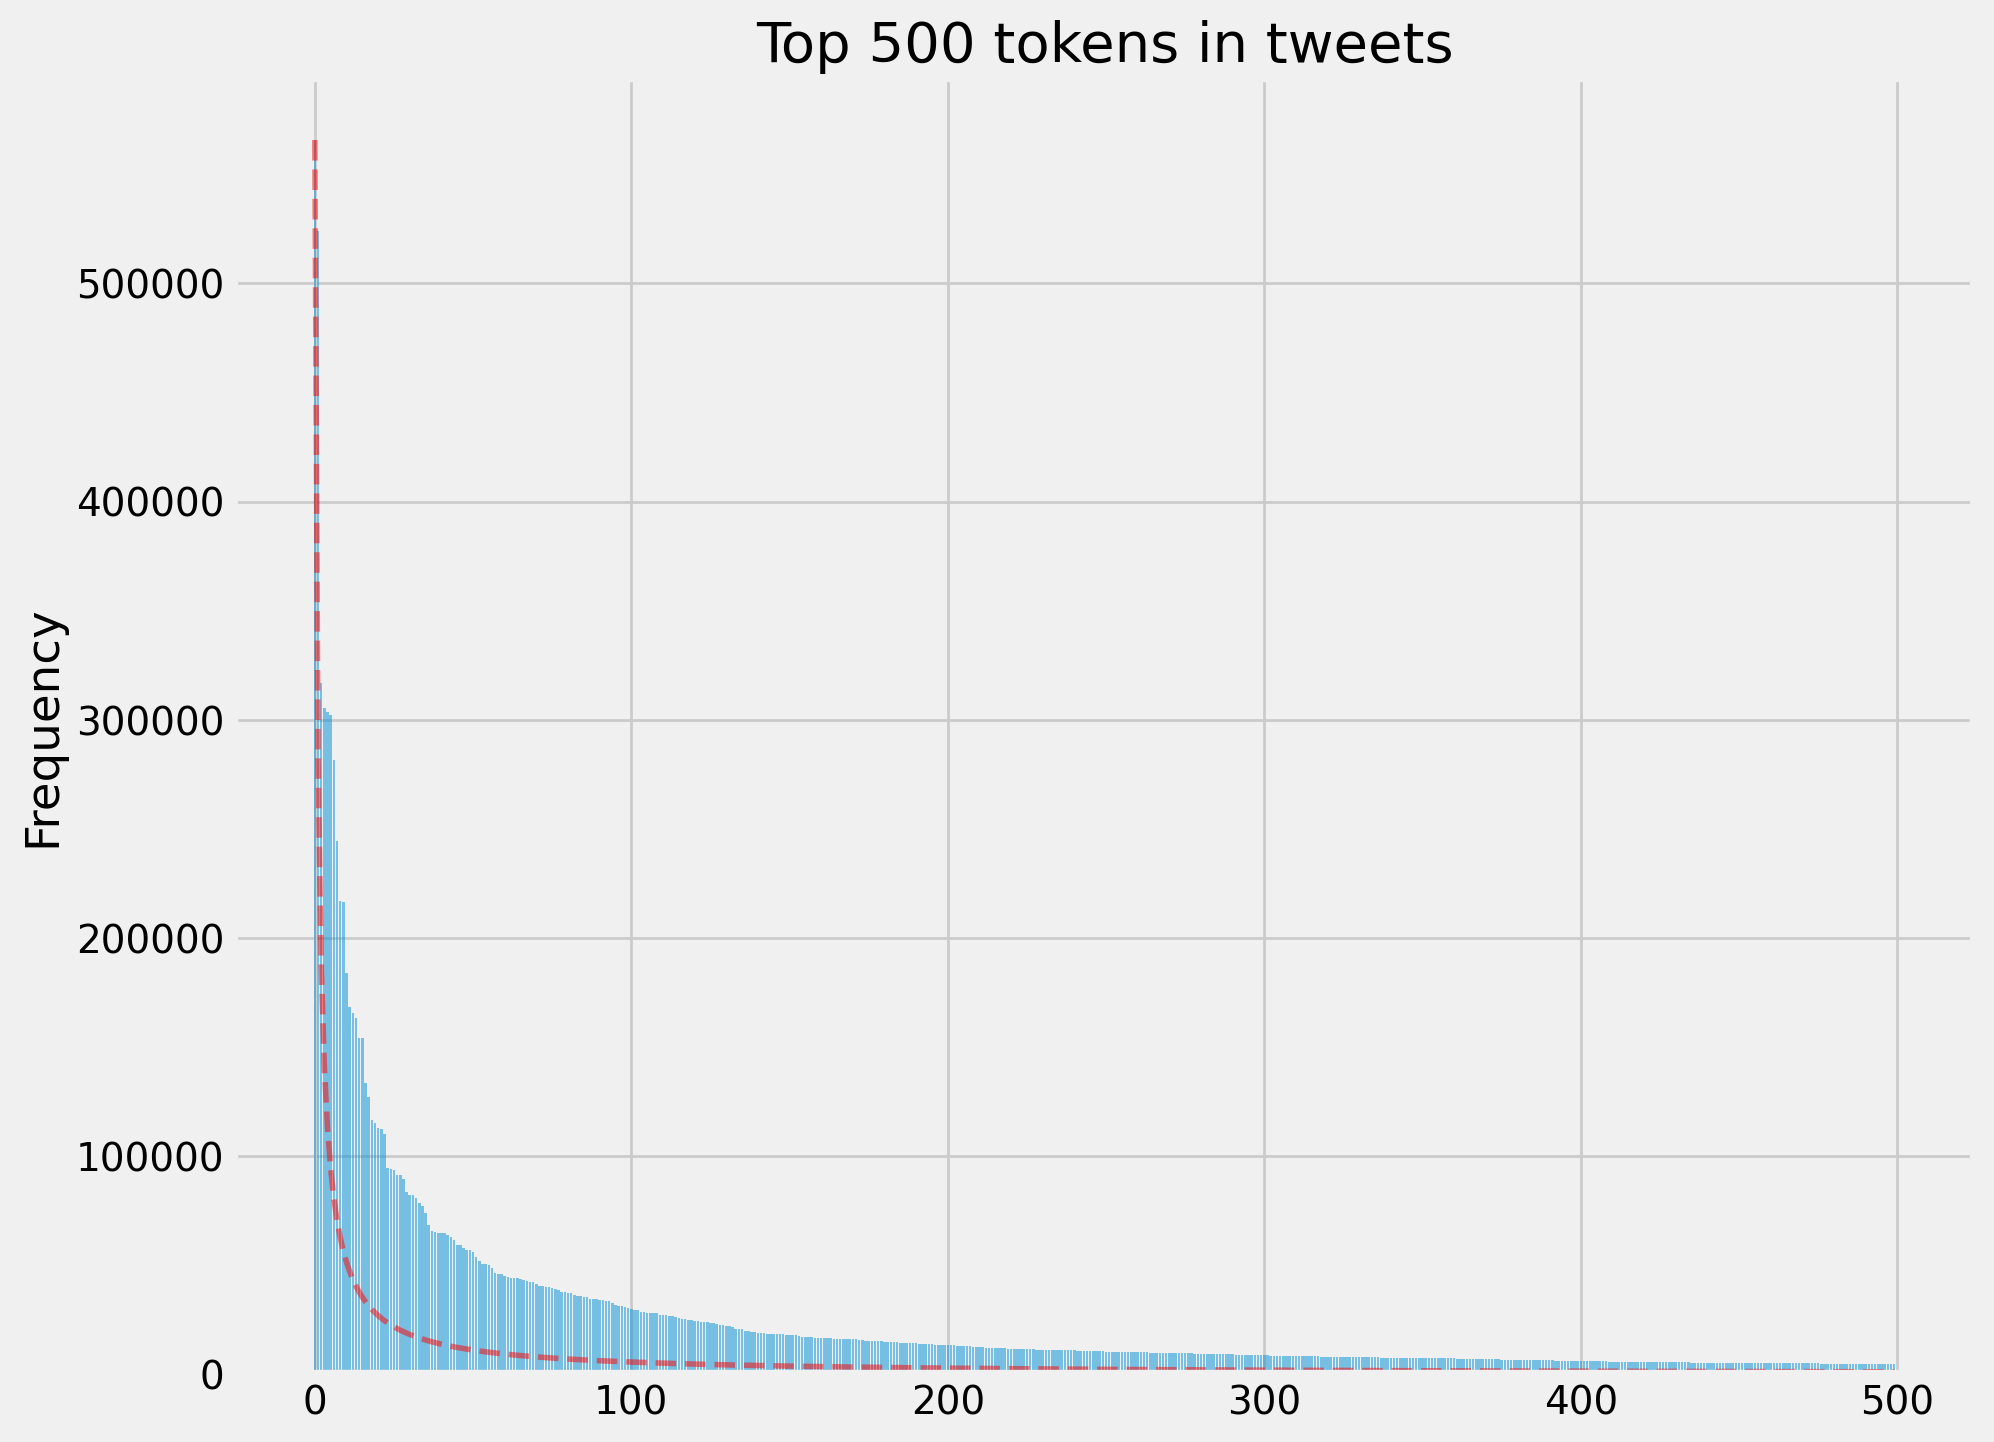

In [33]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

<ipython-input-34-3e35b50ecd5b>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencies = counts[indices]
<ipython-input-34-3e35b50ecd5b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
<ipython-input-34-3e35b50ecd5b>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]],


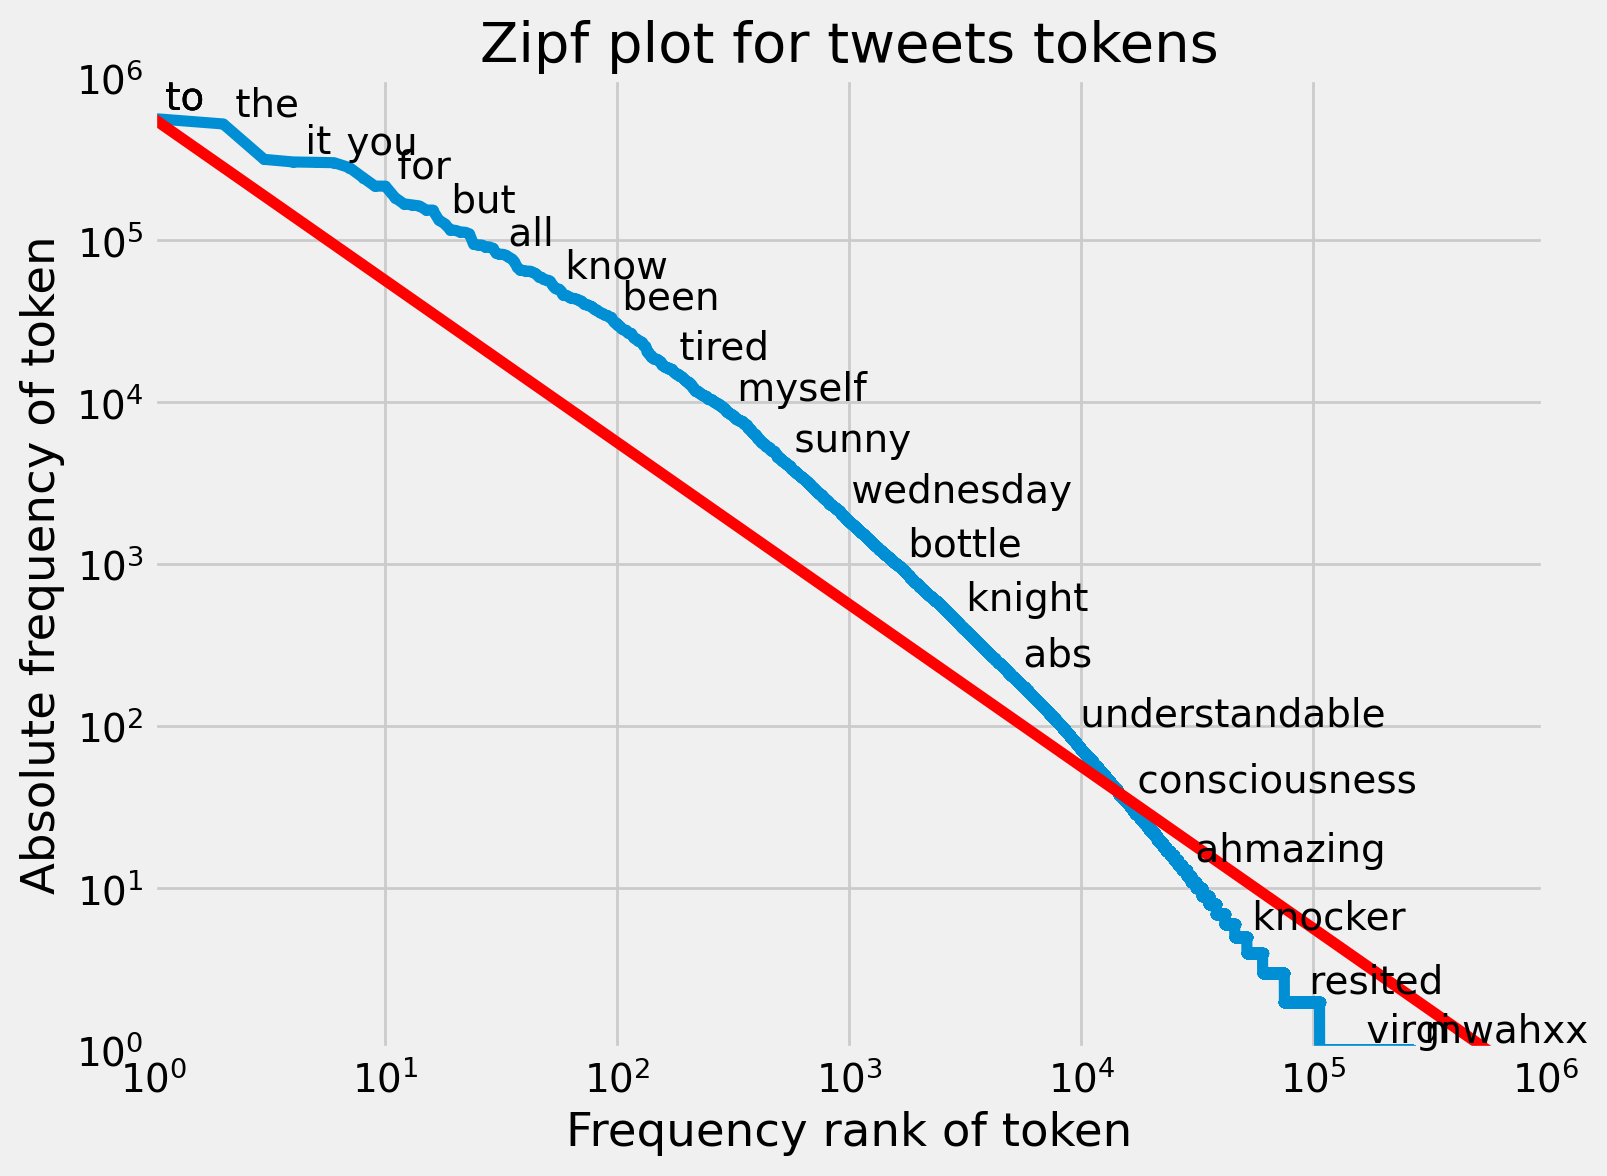

In [34]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]],
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [35]:
term_freq_df = pd.read_csv("/content/drive/MyDrive/bachelor project/term_freq_df.csv",index_col=0, encoding='utf_8')

# Tweets Tokens Visualization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(max_features=10000, stop_words='english')

In [37]:
document_matrix = cvec.transform(my_df.text)

In [38]:
%%time
neg_batches = np.linspace(0,798179,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

88686 entries' term freuquency calculated
177373 entries' term freuquency calculated
266059 entries' term freuquency calculated
354746 entries' term freuquency calculated
443432 entries' term freuquency calculated
532119 entries' term freuquency calculated
620805 entries' term freuquency calculated
709492 entries' term freuquency calculated
798179 entries' term freuquency calculated
CPU times: user 8.2 s, sys: 20.3 s, total: 28.5 s
Wall time: 29.6 s


In [39]:
%%time
pos_batches = np.linspace(798179,1596019,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

886827 entries' term freuquency calculated
975476 entries' term freuquency calculated
1064125 entries' term freuquency calculated
1152774 entries' term freuquency calculated
1241423 entries' term freuquency calculated
1330072 entries' term freuquency calculated
1418721 entries' term freuquency calculated
1507370 entries' term freuquency calculated
1596019 entries' term freuquency calculated
CPU times: user 8.14 s, sys: 18 s, total: 26.1 s
Wall time: 27 s


In [40]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

negative  positive   total
just      64002     62943  126945
good      29208     62117   91325
day       41372     48188   89560
like      41047     37522   78569
today     38116     30100   68216
work      45419     19529   64948
love      16989     47695   64684
going     33689     30939   64628
got       33408     28037   61445
lol       23123     36118   59241

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

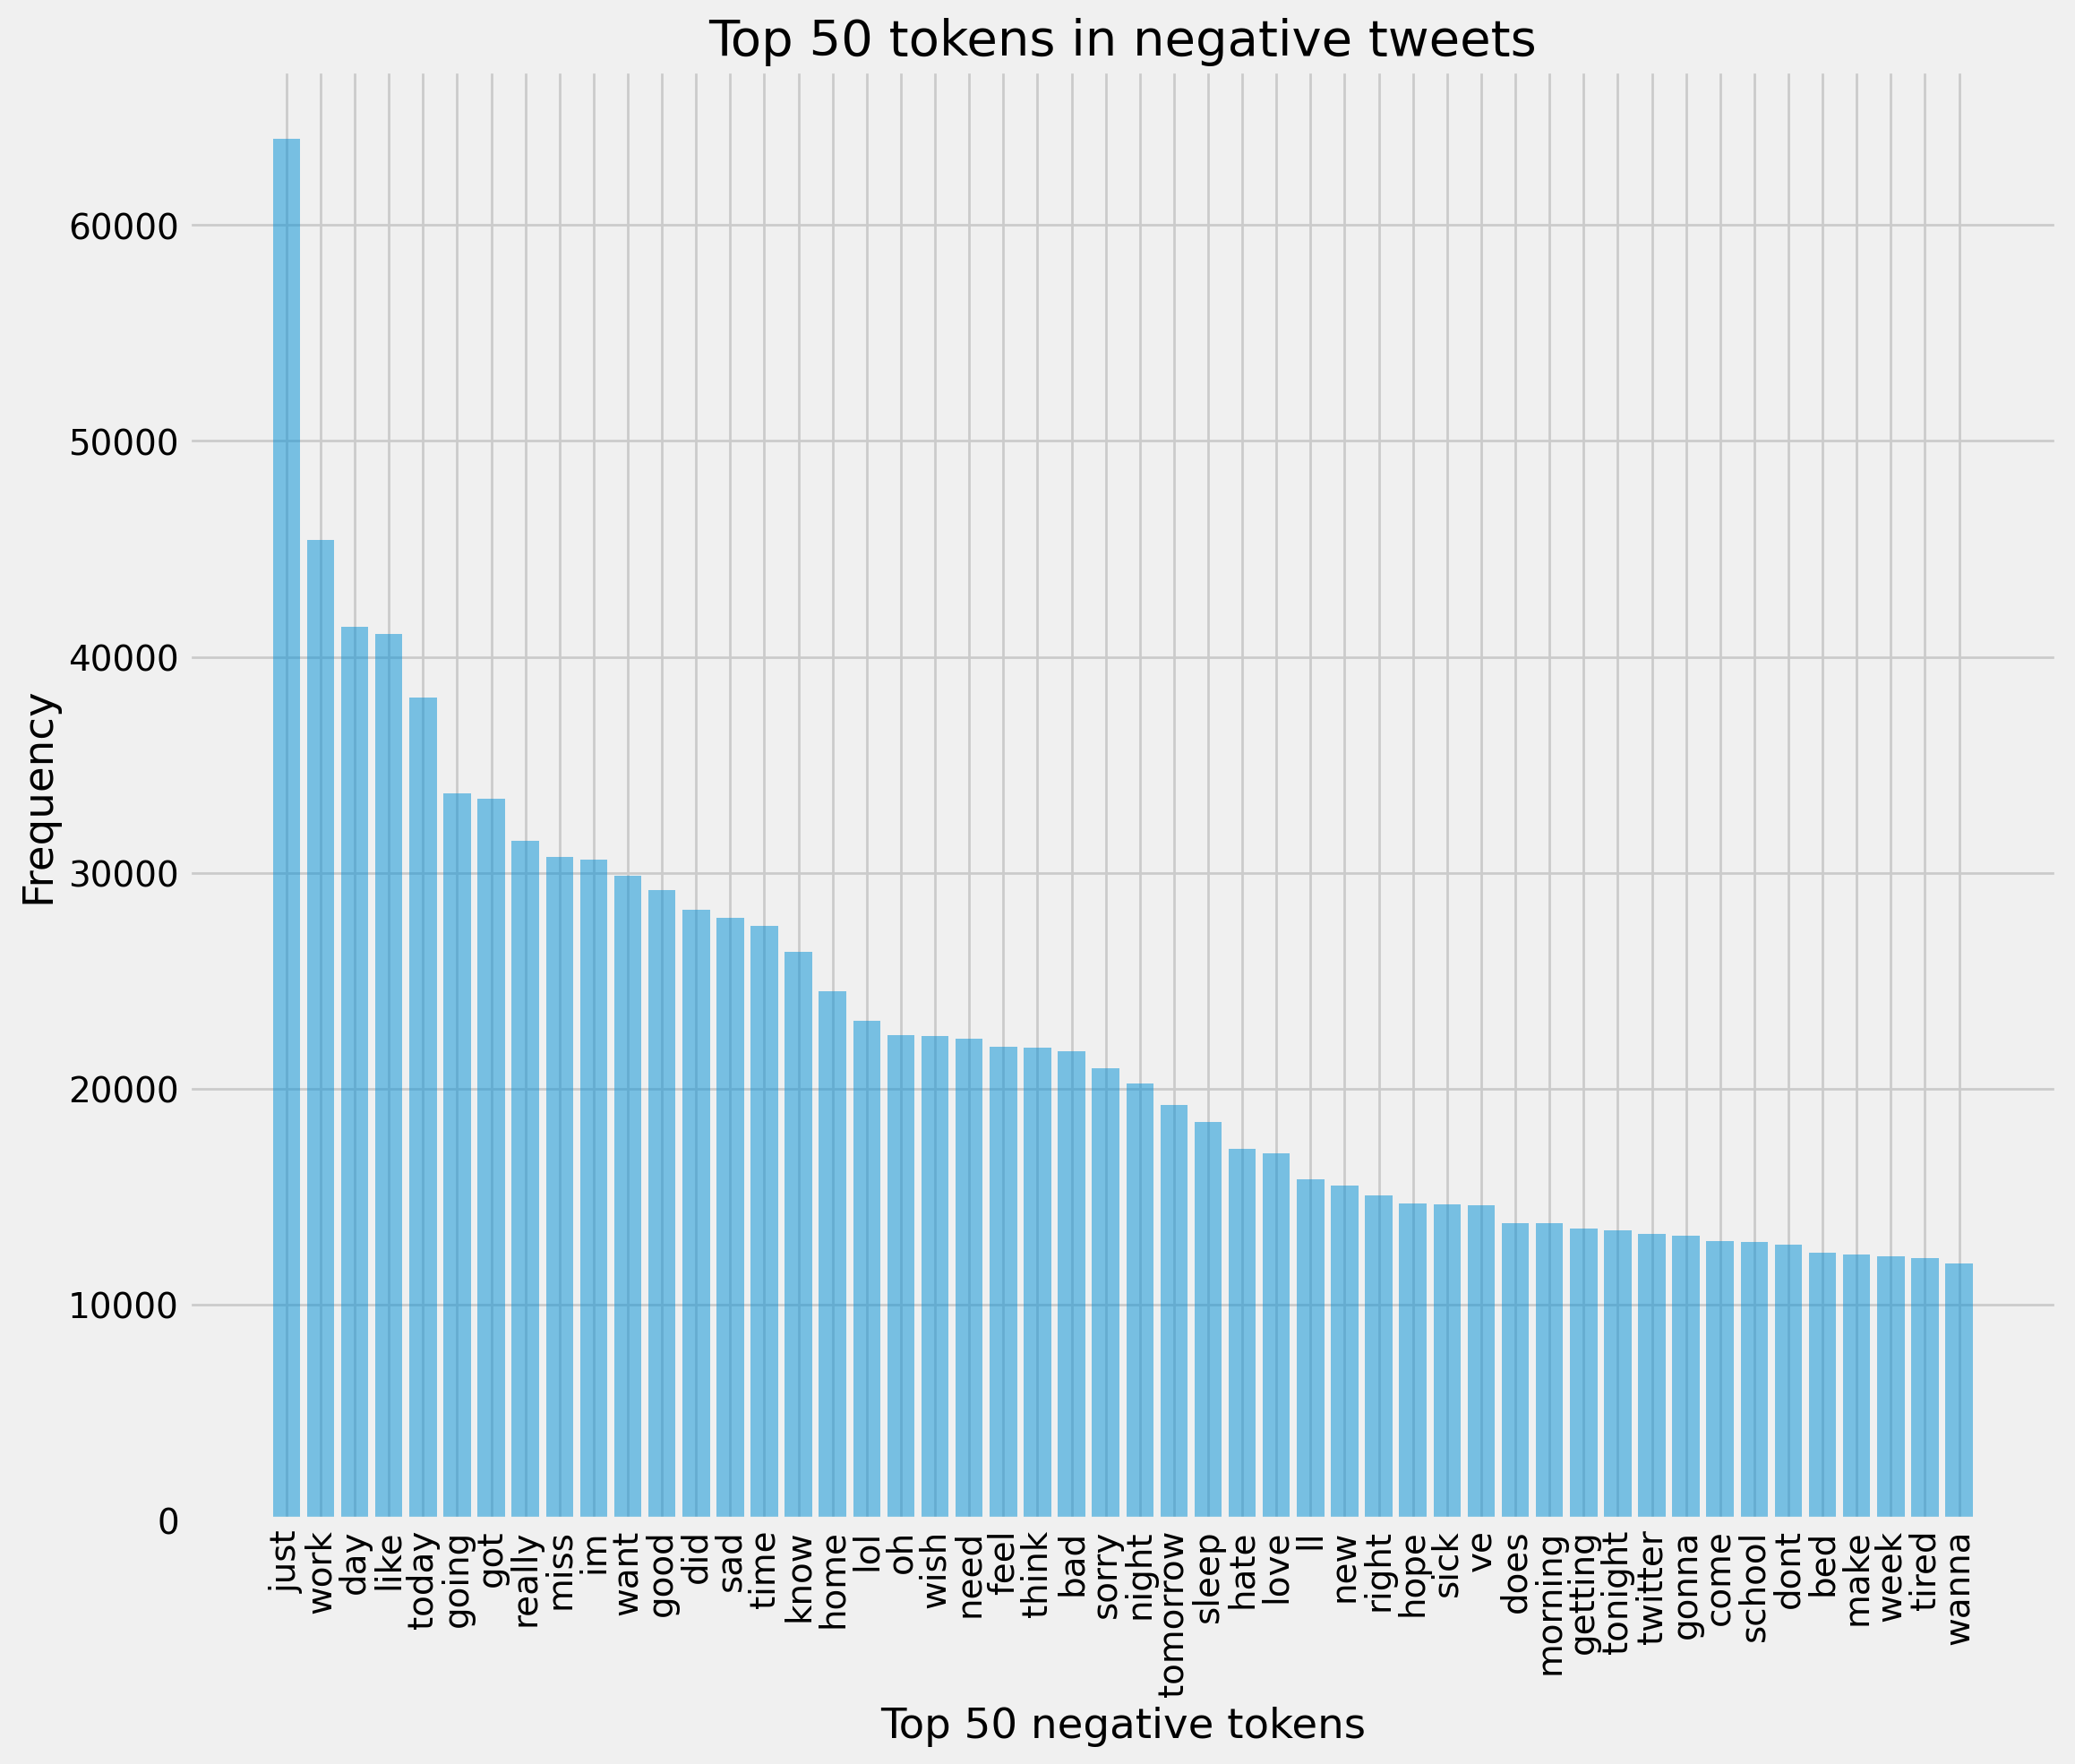

In [41]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

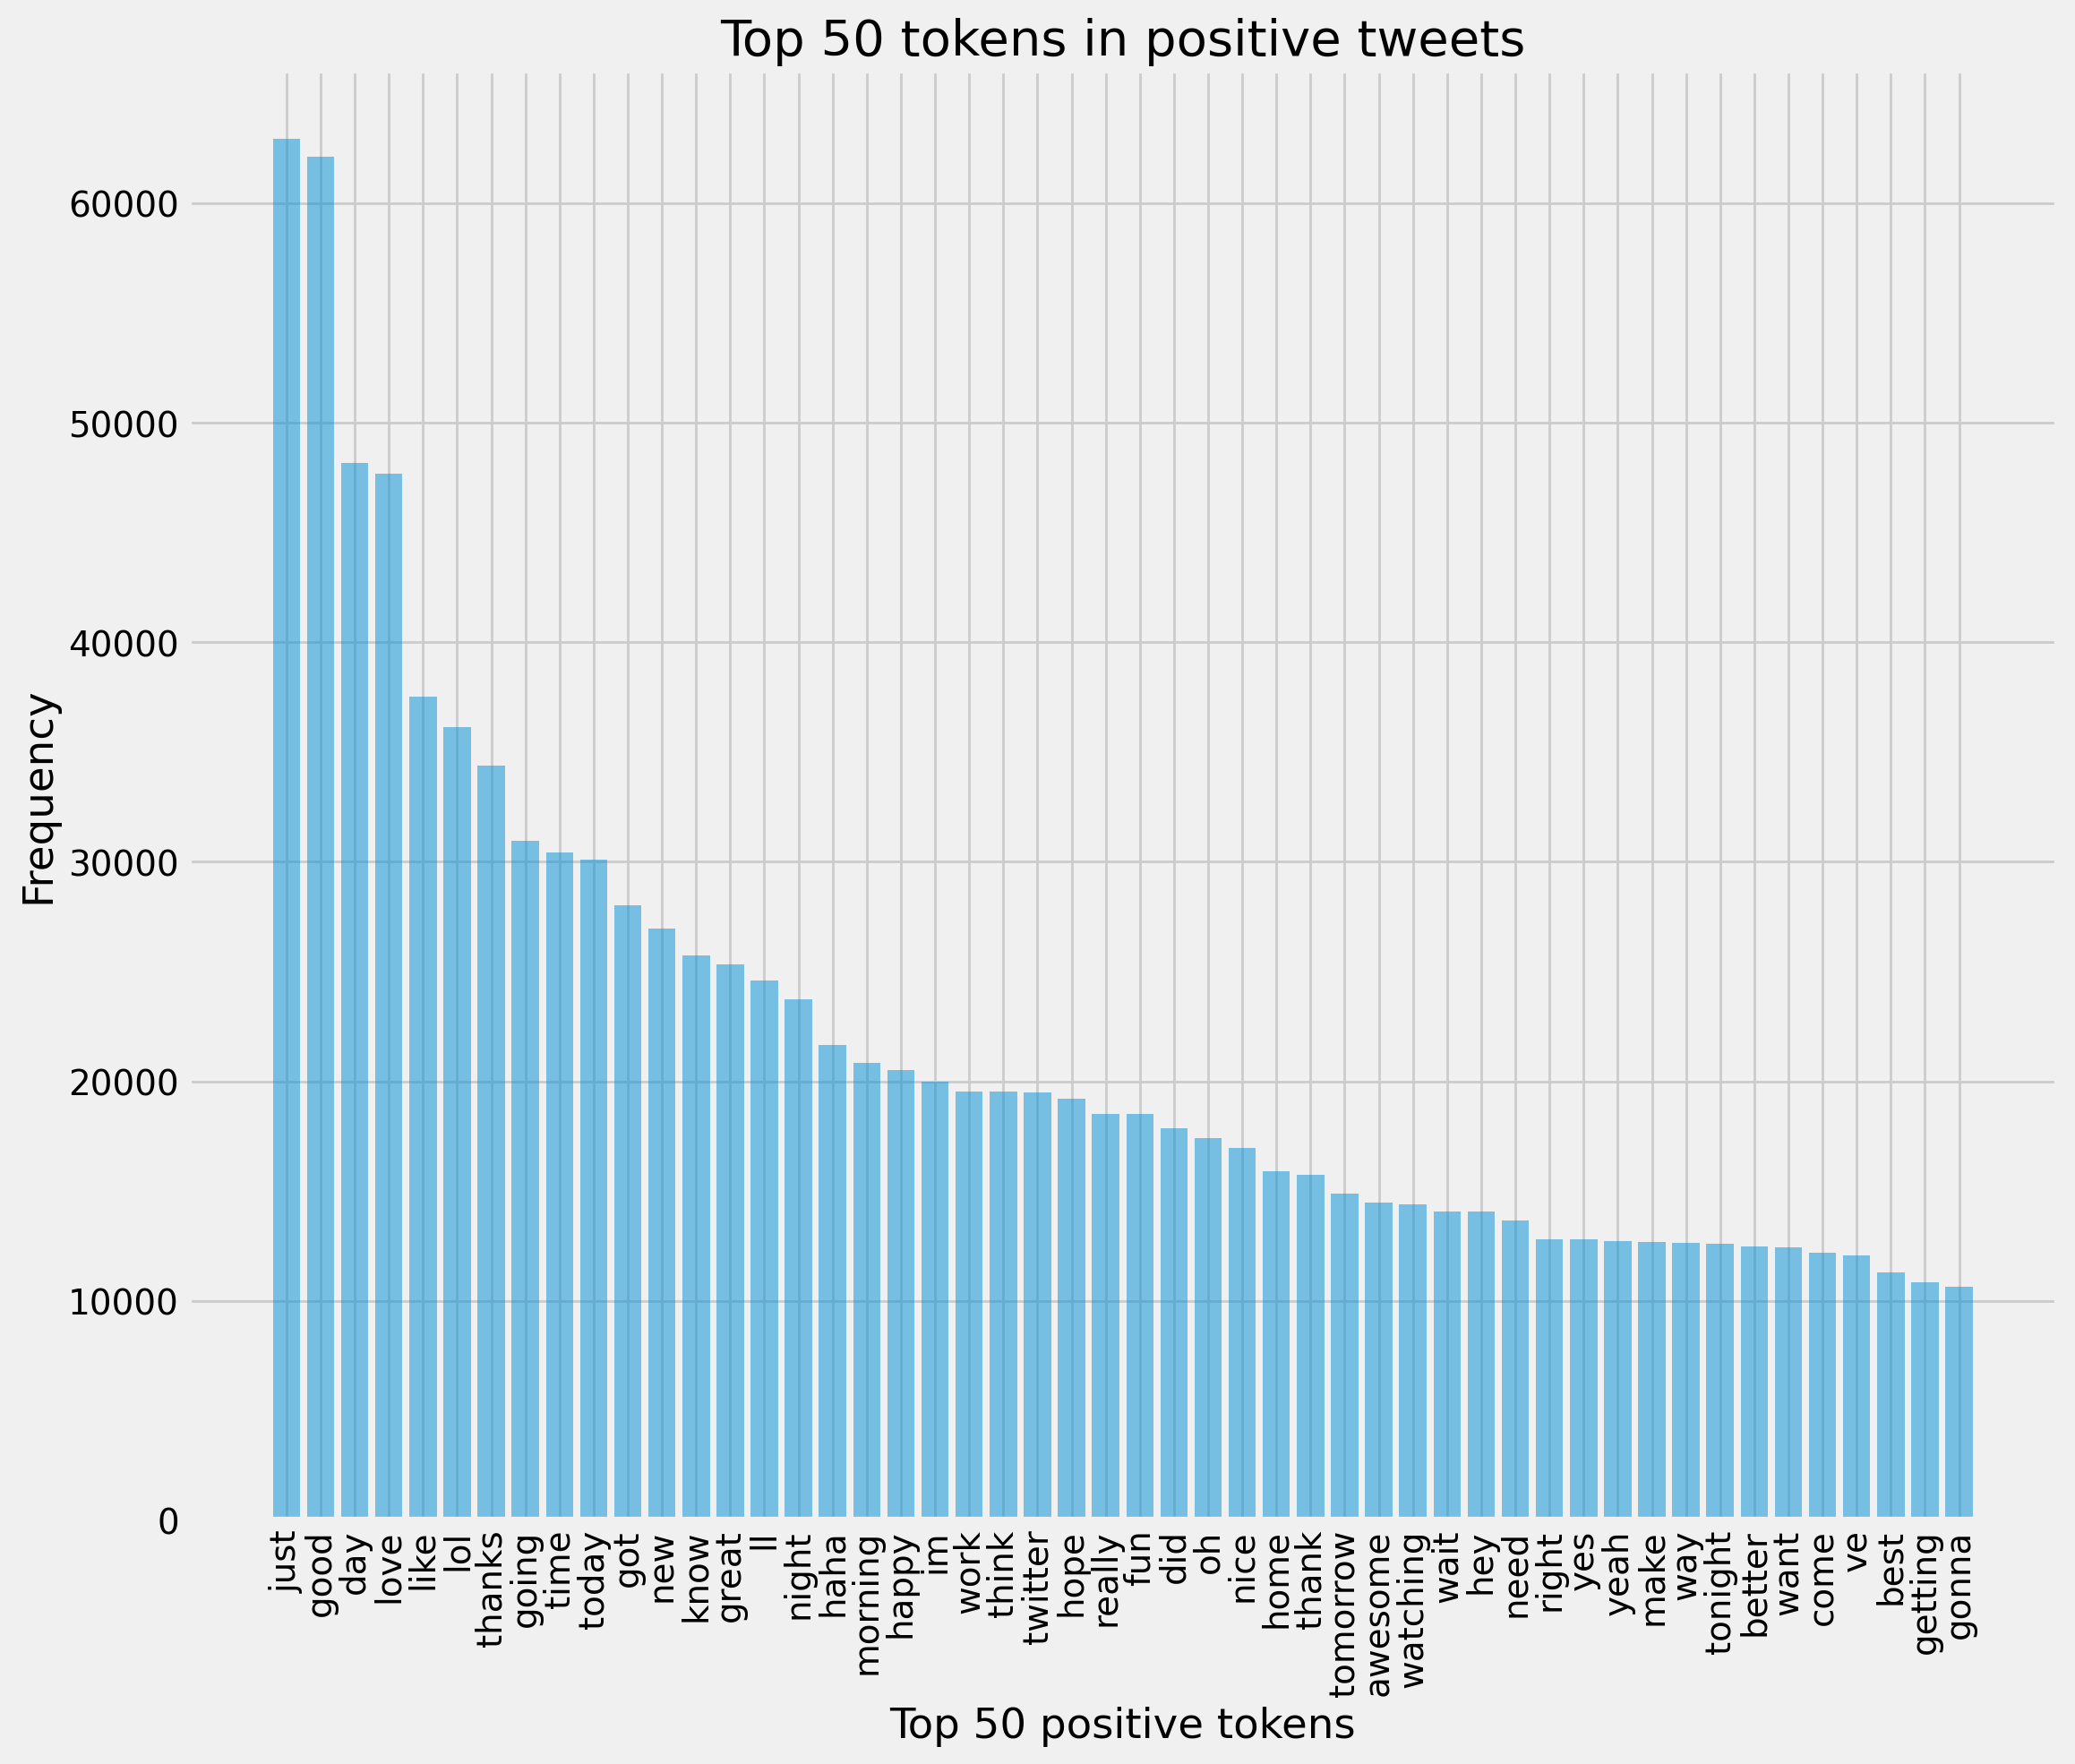

In [42]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

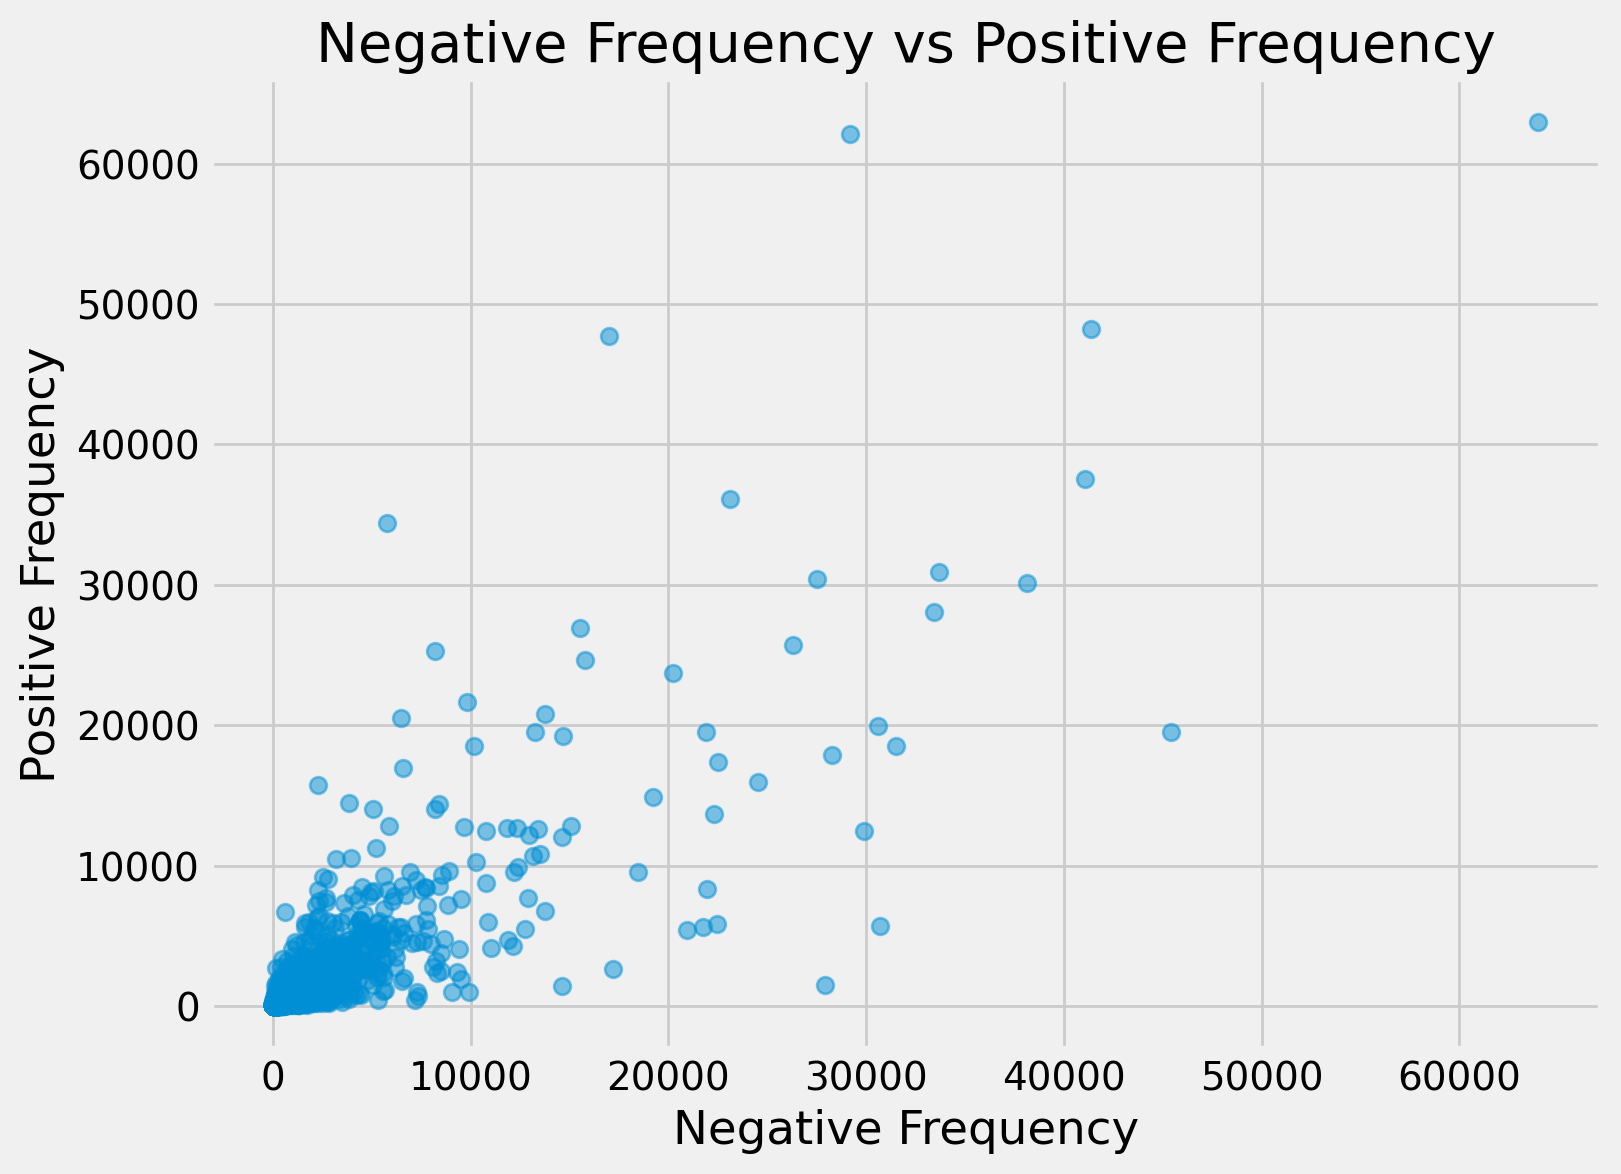

In [43]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

metric1: **pos_rate**

In [44]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

negative  positive  total  pos_rate
emailunlimited         0       100    100  1.000000
dividends              0        83     83  1.000000
mileymonday            0       161    161  1.000000
shareholder            1        80     81  0.987654
fuzzball               2        99    101  0.980198
recommends             3       109    112  0.973214
delongeday             6       162    168  0.964286
atcha                  3        80     83  0.963855
timestamp              3        68     71  0.957746
shaundiviney           4        89     93  0.956989

metric 2: **pos_freq_pct**

In [45]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

negative  positive   total  pos_rate  pos_freq_pct
just       64002     62943  126945  0.495829      0.014396
good       29208     62117   91325  0.680175      0.014207
day        41372     48188   89560  0.538053      0.011021
love       16989     47695   64684  0.737354      0.010908
like       41047     37522   78569  0.477567      0.008582
lol        23123     36118   59241  0.609679      0.008261
thanks      5768     34375   40143  0.856314      0.007862
going      33689     30939   64628  0.478724      0.007076
time       27526     30429   57955  0.525045      0.006960
today      38116     30100   68216  0.441245      0.006884

metric 3: **pos_hmean**

In [46]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0
                                                                   else 0), axis=1)
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

negative  positive   total  pos_rate  pos_freq_pct  pos_hmean
just       64002     62943  126945  0.495829      0.014396   0.027979
good       29208     62117   91325  0.680175      0.014207   0.027833
day        41372     48188   89560  0.538053      0.011021   0.021600
love       16989     47695   64684  0.737354      0.010908   0.021499
like       41047     37522   78569  0.477567      0.008582   0.016861
lol        23123     36118   59241  0.609679      0.008261   0.016300
thanks      5768     34375   40143  0.856314      0.007862   0.015581
going      33689     30939   64628  0.478724      0.007076   0.013946
time       27526     30429   57955  0.525045      0.006960   0.013737
today      38116     30100   68216  0.441245      0.006884   0.013557

metric 4: **pos_normcdf_hmean**

In [47]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_hmean  \
welcome       620      6702   7322  0.915324      0.001533   0.003061   
thank        2282     15736  18018  0.873349      0.003599   0.007169   
thanks       5768     34375  40143  0.856314      0.007862   0.015581   
awesome      3821     14469  18290  0.791088      0.003309   0.006591   
glad         2273      8254  10527  0.784079      0.001888   0.003767   
follow       2551      9155  11706  0.782078      0.002094   0.004177   
enjoy        1642      5876   7518  0.781591      0.001344   0.002683   
sweet        1610      5646   7256  0.778115      0.001291   0.002578   
yay          3165     10500  13665  0.768386      0.002401   0.004788   
hello        1122      4524   5646  0.801275      0.001035   0.002067   

         pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  
welcome          0.995624              0.999369           0.997493  
thank            0.990793              1.000000           0.995375  
thanks           0.987772              1.000000           0.993848  
awesome          0.967042              1.000000           0.983245  
glad             0.963660              0.999971           0.981480  
follow           0.962644              0.999996           0.980965  
enjoy            0.962393              0.997441           0.979604  
sweet            0.960563              0.996331           0.978121  
yay              0.955055              1.000000           0.977011  
hello            0.971490              0.982294           0.976862

In [48]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0
                                                                   else 0), axis=1)
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_hmean  \
sad          27907      1514  29421  0.051460      0.000346   0.000688   
hurts         7204       456   7660  0.059530      0.000104   0.000208   
sick         14616      1420  16036  0.088551      0.000325   0.000647   
sucks         9902       982  10884  0.090224      0.000225   0.000448   
poor          7333       719   8052  0.089295      0.000164   0.000328   
ugh           9055       998  10053  0.099274      0.000228   0.000455   
missing       7282       991   8273  0.119787      0.000227   0.000452   
headache      5317       421   5738  0.073371      0.000096   0.000192   
hate         17207      2614  19821  0.131880      0.000598   0.001190   
miss         30713      5676  36389  0.155981      0.001298   0.002575   

          pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  neg_rate  \
sad               0.002399              0.710297           0.004781  0.948540   
hurts             0.002807              0.503855           0.005583  0.940470   
sick              0.004845              0.693525           0.009623  0.911449   
sucks             0.004995              0.610420           0.009910  0.909776   
poor              0.004912              0.557659           0.009737  0.910705   
ugh               0.005882              0.613575           0.011653  0.900726   
missing           0.008426              0.612195           0.016624  0.880213   
headache          0.003656              0.496667           0.007258  0.926629   
hate              0.010341              0.868741           0.020439  0.868120   
miss              0.015313              0.996497           0.030162  0.844019   

          neg_freq_pct  neg_hmean  neg_rate_normcdf  neg_freq_pct_normcdf  \
sad           0.006095   0.012112          0.997601              1.000000   
hurts         0.001573   0.003142          0.997193              0.999742   
sick          0.003192   0.006362          0.995155              1.000000   
sucks         0.002163   0.004315          0.995005              0.999999   
poor          0.001602   0.003198          0.995088              0.999799   
ugh           0.001978   0.003947          0.994118              0.999995   
missing       0.001590   0.003175          0.991574              0.999778   
headache      0.001161   0.002320          0.996344              0.993812   
hate          0.003758   0.007484          0.989659              1.000000   
miss          0.006708   0.013310          0.984687              1.000000   

          neg_normcdf_hmean  
sad                0.998799  
hurts              0.998466  
sick               0.997572  
sucks              0.997496  
poor               0.997438  
ugh                0.997048  
missing            0.995659  
headache           0.995076  
hate               0.994802  
miss               0.992284

Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

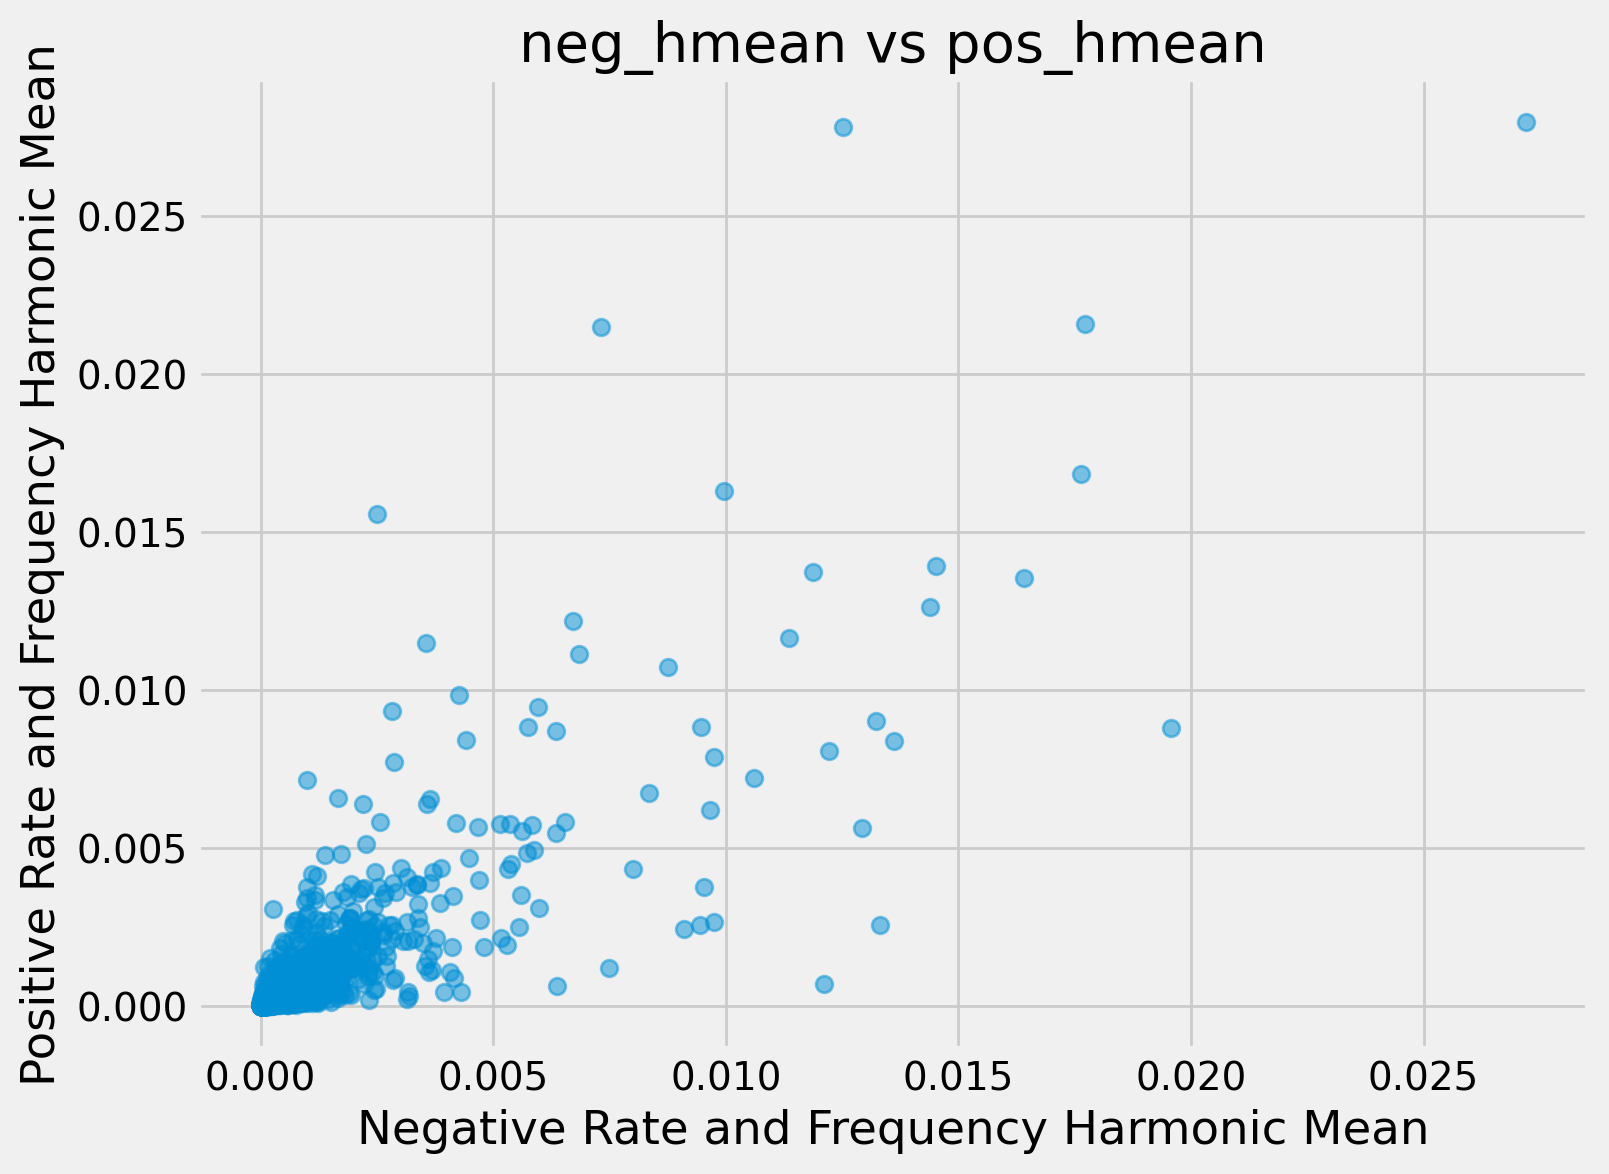

In [49]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

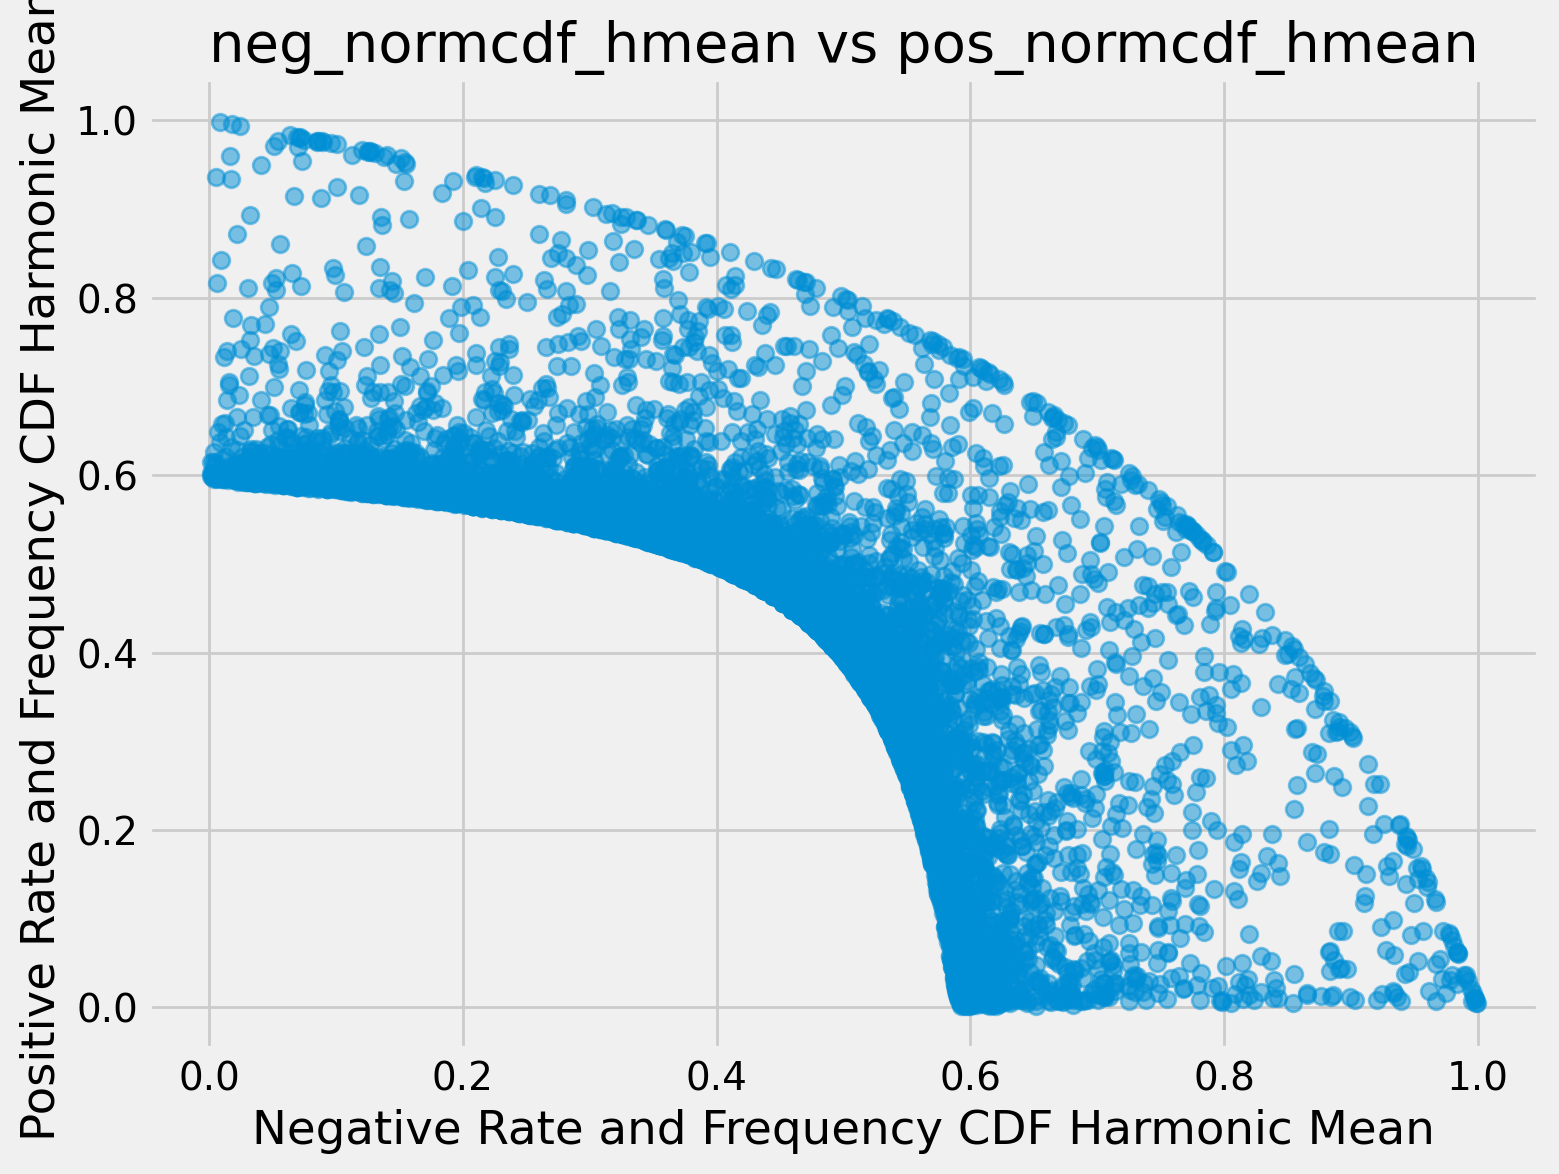

In [50]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [51]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.scatter('neg_normcdf_hmean','pos_normcdf_hmean', marker="circle",size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

# Train / Validation / Test Split

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
csv = "/content/drive/MyDrive/bachelor project/clean_tweet.csv"
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

text  target
0  awww that bummer you shoulda got david carr of...       0
1  is upset that he can not update his facebook b...       0
2  dived many times for the ball managed to save ...       0
3     my whole body feels itchy and like its on fire       0
4  no it not behaving at all mad why am here beca...       0

In [55]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [56]:
x = my_df.text
y = my_df.target

In [57]:
from sklearn.model_selection import train_test_split

SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=0.02, random_state=SEED, stratify=y)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=0.5, random_state=SEED, stratify=y_validation_and_test)

In [59]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.01% negative, 49.99% positive
Validation set has total 15960 entries with 50.01% negative, 49.99% positive
Test set has total 15961 entries with 50.01% negative, 49.99% positive


# Lexical Approach

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

CountVectorizer(max_features=10000)

In [61]:
neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)

In [62]:
%%time
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

CPU times: user 53.1 ms, sys: 903 µs, total: 54 ms
Wall time: 56.7 ms


In [63]:
from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  pos_freq_pct  pos_rate_normcdf  \
thanks       5639     33748  39387  0.856831      0.004066          0.988759   
thank        2238     15436  17674  0.873373      0.001860          0.991516   
awesome      3738     14190  17928  0.791499      0.001710          0.968995   
happy        6356     20111  26467  0.759852      0.002423          0.952020   
great        8048     24780  32828  0.754843      0.002986          0.948753   
love        16652     46753  63405  0.737371      0.005633          0.935952   
hey          4949     13763  18712  0.735517      0.001658          0.934459   
nice         6463     16632  23095  0.720156      0.002004          0.921034   
yay          3104     10280  13384  0.768081      0.001239          0.957024   
haha         9627     21267  30894  0.688386      0.002563          0.886827   

         pos_freq_pct_normcdf  pos_normcdf_hmean  
thanks               1.000000           0.994347  
thank                0.990738           0.991127  
awesome              0.984383           0.976628  
happy                0.999061           0.974973  
great                0.999944           0.973676  
love                 1.000000           0.966916  
hey                  0.981476           0.957390  
nice                 0.994580           0.956395  
yay                  0.936202           0.946499  
haha                 0.999508           0.939802

In [64]:
term_freq_df2.to_csv("/content/drive/MyDrive/bachelor project/term_freq_df2.csv")

In [65]:
pos_hmean = term_freq_df2.pos_normcdf_hmean

In [66]:
pos_hmean['wtf']

0.04253030466545645

In [67]:
%%time
y_val_predicted_proba = []
for t in x_validation:
    hmean_scores = [pos_hmean[w] for w in t.split() if w in pos_hmean.index]
    if len(hmean_scores) > 0:
        prob_score = np.mean(hmean_scores)
    else:
        prob_score = np.random.random()
    y_val_predicted_proba.append(prob_score)

pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]
from sklearn.metrics import accuracy_score
accuracy_score(y_validation,pred)

CPU times: user 1.47 s, sys: 4.22 ms, total: 1.48 s
Wall time: 1.54 s


0.7591478696741855

In [68]:
# Combine into a DataFrame
test_data = {
    'x_validation': x_validation,
    'y_validation': y_validation,
}

df = pd.DataFrame(test_data)

# Save to Google Drive
csv_path = '/content/drive/MyDrive/bachelor project/test_data.csv'
df.to_csv(csv_path, index=False)

# Searchable Encryption